### Deterministic Dynamical Systems

Instead of analyzing data directly, we can simulate mathematical models
that represent how our data was generated. A representative model gives us an explanation
of the real-world processes underlying our data.

Dynamical systems can be represented by mathematical equations that describe the evolution of quantities over time and space. They can represent a wide variety of real-world phenomena in physics, chemistry, biology, economics. 

- Deterministic dynamical systems. This term is used in contrast to stochastic systems, which incorporate randomness in their rules.

The types of deterministic dynamical systems: 
- Ordinary Differential Equations (ODEs)
- Partial Differential Equations (PDEs)
- Discrete-time dynamical systems (iterated functions)

#### ODE example

Let $u =(x,y)$ encode the 2D position of our particle with mass $m$. This particle is subject to two forces: gravity $mg =(0, -9.81m)$ and air drag $F=-ku'$. Then, the differential equation becomes, 
$$m \cdot u''=F + mg$$
We get the second-order ODE:
$$ u''=-\frac{k}{m}u' + g$$

The numpy, scipy has functions for a black-box solver; thus we simply specify the function that
describes the system, and scipy solves it automatically.

An example of a simple numerical solver is the **Euler method**. To numerically solve the
autonomous ODE $y'=f(y)$, the method consists of **discretizing time with a time step $dt$** and
replacing $y'$ with a first-order approximation:
$$ y'(t) \simeq \frac{y(t+dt)-y(t)}{dt}$$

Then, starting from an initial condition $y_0$, the method evaluates $y$ successively:
$$y_{n+1} = y_n + dt \cdot f(y_n)$$

#### PDE example

PDEs are hard to solve analytically. Therefore, PDEs are often studied via numerical simulations.

---------------------------------------

### Stochastic Dynamical Systems

Stochastic dynamical systems are dynamical systems subjected to the effect of noise. For example, the evolution of a share price typically exhibits long-term behaviors along with faster, smaller-amplitude oscillations.

Applications of stochastic systems to data science include methods for statistical
inference (such as discrete-time Markov chain Monte Carlo) 

- As far as continuous-time systems are concerned, Ordinary Differential Equations with noise
yield Stochastic Differential Equations (SDEs). Partial Differential Equations with noise yield
Stochastic Partial Differential Equations (SPDEs).


#### Simulating a discrete-time Markov chain

Discrete-time Markov chains are stochastic processes that undergo transitions from one
state to another in a state space. Transitions occur at every time step

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
a = .51 / 100  # birth rate
b = .45 / 100  # death rate

In [25]:
nsteps = 1000
x = np.zeros(nsteps)
x[0] = 25

In [26]:
for t in range(nsteps - 1):
    # Is there a birth?
    birth = np.random.rand() <= a * x[t]
    # Is there a death?
    death = np.random.rand() <= b * x[t]
    # We update the population size.
    x[t + 1] = x[t] + 1 * birth - 1 * death

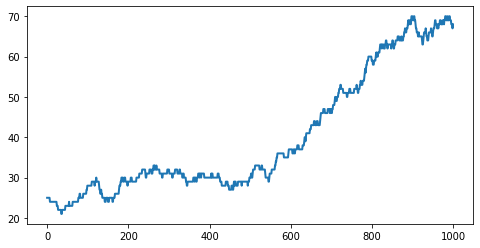

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, lw=2)

#### Simulating a Brownian motion

The **Brownian motion** (or **Wiener process**) is a fundamental object in mathematics, physics. This model describes the movement of a particle suspended in a fluid resulting from random collisions with the quick molecules in
the fluid (diffusion). More generally, the Brownian motion models a continuous-time random
walk, where a particle evolves in space by making independent random steps in all directions.

Mathematically, the Brownian motion is a particular Markov continuous stochastic process. 

In [74]:
n = 2000

x = np.cumsum(np.random.randn(n))
y = np.cumsum(np.random.randn(n))

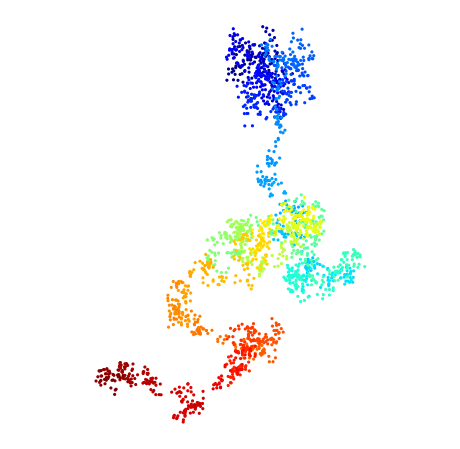

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.scatter(x, y, c=range(n), linewidths=0,
           marker='o', s=10, cmap=plt.cm.jet,)
ax.axis('equal')
ax.set_axis_off()

The increments of the Brownian motion $W(t+\tau)-W(t)$ are Gaussian. 
$$ W(t+\tau)-W(t) \sim \mathcal{N}(0,\tau)$$
In particular, the density of $W(t)$ is a normal distribution with variance $t$.

Additionally, the Brownian motion, and stochastic processes in general, have deep
connections with partial differential equations. Here, the density of $W(t)$ is a solution
of the heat equation, a particular diffusion equation. More generally, the **Fokker-Planck
equation** is a partial differential equation satisfied by the density of solutions of a stochastic
differential equation.

The Brownian motion is a limit of a random walk with an infinitesimal step size. We used this
property here to simulate the process.

#### Simulating a stochastic differential equation

Stochastic Differential Equations (SDEs) model dynamical systems that are subject to noise. 

Here, we simulate an **Ornstein-Uhlenbeck process**, which is a solution of the
**Langevin equation**. This model describes the stochastic evolution of a particle in a fluid under
the influence of **friction**. The particle's movement is due to collisions with the molecules of the
fluid (diffusion). The difference with the Brownian motion is the presence of friction.

- The Ornstein-Uhlenbeck process is stationary, Gaussian, and Markov, which makes it a good
candidate to represent stationary random noise.
We will simulate this process with a numerical method called the **Euler-Maruyama method**.
It is a simple generalization to SDEs of the Euler method for ODEs. It is like the
standard Euler method for ODEs, but with an extra stochastic term (which is just a
scaled normal random variable).


In [76]:
sigma = 1.  # Standard deviation.
mu = 10.  # Mean.
tau = .05  # Time constant.

In [77]:
dt = .001  # Time step.
T = 1.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

In [82]:
x = np.zeros(n)

The Langevin equation that we use here is the following stochastic differential equation:
$$dx =-\frac{(x-\mu)}{\tau}dt + \sigma \sqrt{\frac{2}{\tau}}dW$$

Here, $x(t)$is our stochastic process, $dx$ is the infinitesimal increment, $\mu$ is the mean, $\sigma$ is the
standard deviation, and $\tau$ is the time constant. Also, $W$ is a Brownian motion (or the Wiener
process) that underlies our SDE.

The first term on the right-hand side is the deterministic term, while the second
term is the stochastic term. **Without that last term, the equation would be a regular
deterministic ODE.**

The infinitesimal step of a Brownian motion is a Gaussian random variable. Specifically,
the derivative (in a certain sense) of a Brownian motion is a white noise, a sequence of
independent Gaussian random variables.

The **Euler-Maruyama method involves discretizing time** and adding infinitesimal steps to the
process at every time step. This method involves a deterministic term (like in the standard
Euler method for ODEs) and a stochastic term (random Gaussian variable). Specifically,
for an equation:

$$dx = a(t,x)dt + b(t,x)dW$$

The numerical scheme is (with $t=n*dt$):
$$x_{n+1}=x_n + dx = x_n + a(t,x)dt + b(t,x) \sqrt{dt}\xi, \quad \xi \sim \mathcal{N}(0,1)$$

Here, $\xi$ is a random Gaussian variable with variance 1 (independent at each time step). The
normalization factor $\sqrt{dt}$ comes from the fact that the infinitesimal step for a Brownian motion
has the standard deviation $\sqrt{dt}$.

In [88]:
sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)

In [89]:
sigma_bis

6.324555320336759

In [90]:
sqrtdt

0.03162277660168379

In [91]:
n

1000

In [83]:
for i in range(n - 1):
    x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn()

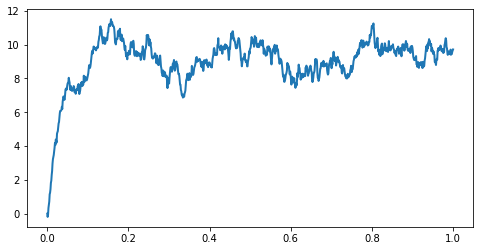

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=2)

Now, we are going to take a look at the time evolution of the distribution of the
process. To do this, we will simulate many independent realizations of the same
process in a vectorized way. We define a vector X that will contain all realizations
of the process at a given time (that is, we do not keep all realizations at all times
in memory). This vector will be overwritten at every time step.

In [85]:
ntrials = 10000
X = np.zeros(ntrials)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


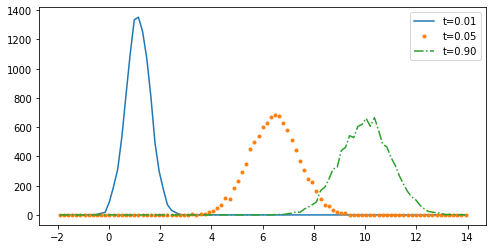

In [86]:
# We create bins for the histograms.
bins = np.linspace(-2., 14., 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i in range(n):
    # We update the process independently for
    # all trials
    X += dt * (-(X - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn(ntrials)
    # We display the histogram for a few points in
    # time
    if i in (5, 50, 900):
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
                {5: '-', 50: '.', 900: '-.', }[i],
                label=f"t={i * dt:.2f}")
    ax.legend()

* **Note** : Particles are constantly random walk but attracted to $\mu=10$ eventually, this is the difference between Langevin(OU process) and pure Brownian motion.